In [1]:
import grid_generation as grid
import propagation_methods as propag

import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

def draw_square(x_min, y_min, x_max, y_max):
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], color='black', linewidth=0.8)

def plot_regions(regions, signatures, samples):

    #sns.set_style("whitegrid")  # Set Seaborn style

    #Plot regions
    for region in regions:
        x_min, y_min = region[0]
        x_max, y_max = region[1]
        draw_square(x_min, y_min, x_max, y_max)


    #Plot signatures
    x_points = [point[0] for point in signatures]
    y_points = [point[1] for point in signatures]
    plt.scatter(signatures[:, 0], signatures[:, 1], color='black', label='Signatures', s=7)

    #Plot samples
    plt.hist2d(samples[:, 0], samples[:, 1], bins=500, alpha=0.3, cmap='coolwarm', cmin=0.1)


    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    
    plt.xlabel('State[0]')
    plt.ylabel('State[1]')
    plt.grid(False)
    #plt.axis('equal')  # Set equal aspect ratio
    plt.show()

### **The grid generation** 

The grid generation is one of the most important steps in our experiments, as it defines the granularity of our mixture approximations. There is some literature related to designing optimal grids (http://www.quantize.maths-fi.com/symposium, for instance), however, we will only adopt a few common-sense heuristics.

For the moment, our code is only capable of designing **hypercubic axis-aligned grids** in which the spacing for each axis may be equally or unequally distributed.  

In [3]:
unbounded_region = np.array([[np.inf, np.inf], [np.inf, np.inf]]) #a representation choice for the unbounded region

##### Building a bi-modal grid

In this notebook, we show how to build a bi-modal grid (useful for bi-modal initial distributions, for instance).

In [4]:
n_samples = 100_000

sigma = 0.1
mean_initial_state = np.array([0, 0])
var_initial_state = np.array([sigma, sigma])

hat_gmm = [np.array([1.0]), np.array([mean_initial_state]), var_initial_state]
samples = propag.sampleFromGMM(n_samples, hat_gmm[0], hat_gmm[1], hat_gmm[2])

In [5]:
vertice_lower, vertice_upper = grid.findMinMaxPoints(samples)

hpr = np.array([vertice_lower, vertice_upper])

outer_signature = grid.computeOuterPoint(hpr)

regions = np.array(grid.subdivideRegion(hpr, samples, 0.01, 0.01))

signatures = grid.placeSignatures(regions)

regions, signatures = grid.addUnboundedRepresentations(regions, unbounded_region, signatures, outer_signature)

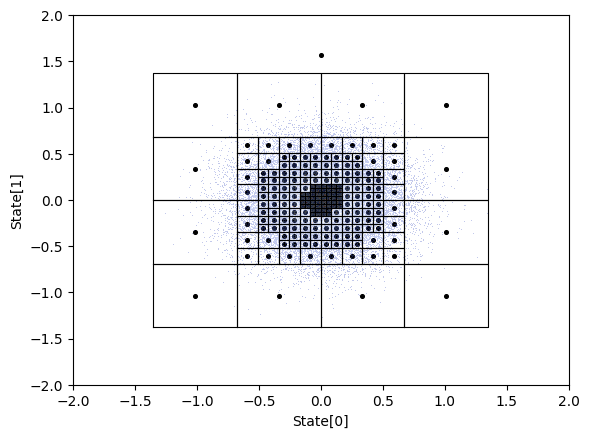

In [6]:
plot_regions(regions, signatures, samples)

In [7]:
len(regions)

212